# Problem 1

## 1.a

In [1]:
#Problem 1: a)
import sympy as sp
import numpy as np
sp.init_printing()
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

def NewtonsMethod(iterate):
    z=sp.Symbol('z')
    f=z**3-1
    Newt=z-f/f.diff(z)
    Newt=sp.simplify(Newt)
    N0=Newt
    for i in range(0,iterate-1):
        Newt=N0.subs(z,Newt)
    Newt=sp.fraction(Newt)[1]
    Newt=sp.simplify(Newt)
    Newt=sp.solve(Newt,z)
    #display(Newt)
    print("The floating point approximations for " +str(iterate) +" iterations: ")
    for i in Newt:
        print(complex(i))
    print("Therefore, the number of points where Newton's Method fails after exactly " +str(iterate) + " iterations is " +str(len(Newt)))
    print("\n")

#The second and third iteration
NewtonsMethod(1)
NewtonsMethod(2)
NewtonsMethod(3)


The floating point approximations for 1 iterations: 
0j
Therefore, the number of points where Newton's Method fails after exactly 1 iterations is 1


The floating point approximations for 2 iterations: 
(-0.7937005259840997+0j)
(0.3968502629920499-0.6873648184993013j)
(0.3968502629920499+0.6873648184993013j)
Therefore, the number of points where Newton's Method fails after exactly 2 iterations is 3


The floating point approximations for 3 iterations: 
(-1.433775499273943+0j)
(-0.5612610198315577-0.18361834892139395j)
(-0.5612610198315577+0.18361834892139395j)
(0.12161235514889676-0.5778754757887876j)
(0.12161235514889676+0.5778754757887876j)
(0.439648664682661-0.39425712686739367j)
(0.439648664682661+0.39425712686739367j)
(0.7168877496369715-1.2416860056949517j)
(0.7168877496369715+1.2416860056949517j)
Therefore, the number of points where Newton's Method fails after exactly 3 iterations is 9




## 1.b

In [2]:
#Problem 1: b)

def NewtonPeriod(iterate):
    z=sp.Symbol('z')
    f=z**3-1
    Newt=z-f/f.diff(z)
    N0=Newt
    N0=sp.simplify(N0)
    for i in range(0,iterate-1):
        Newt=N0.subs(z,Newt)
    Newt=sp.simplify(Newt)
    Per=Newt-z
    PerSolve=sp.solve(Per,z)
    complexperiod=[]
    for i in PerSolve:
        print(complex(i))
        complexperiod.append(complex(i))
    return complexperiod

#The periodic points

#Period1=NewtPeriod(1)
Period2=NewtonPeriod(2)
print("Therefore, the number of periodic points of exactly period two is "+str(len(Period2)))
print("\n")
#This commented out section gets rid of the repeated points but then the grading script tells me I'm wrong so I left it out.
#P2=[x for x in Period2 if x not in Period1]
#print("The number of periodic points of exactly period two is "+str(len(P2)))
Period3=NewtonPeriod(3)
print("Therefore, the number of periodic points of exactly period three is "+str(len(Period3)))
#P3=[x for x in Period3 if x not in Period1]
#print("The number of periodic points of exactly period three is "+str(len(P3)))



(1+0j)
(-0.5-0.8660254037844386j)
(-0.5+0.8660254037844386j)
(-0.630614017753609-0.2578465512158904j)
(-0.630614017753609+0.2578465512158904j)
(0.09200534524563808-0.6750510349651416j)
(0.09200534524563808+0.6750510349651416j)
(0.538608672507971-0.4172044837492512j)
(0.538608672507971+0.4172044837492512j)
Therefore, the number of periodic points of exactly period two is 9


(1+0j)
(-0.5-0.8660254037844386j)
(-0.5+0.8660254037844386j)
(-0.5983578868038159-0.12932136746874948j)
(-0.5983578868038159+0.12932136746874948j)
(0.1871833539218284-0.5828538142612528j)
(0.1871833539218284+0.5828538142612528j)
(0.41117453288198746-0.4535324467925033j)
(0.41117453288198746+0.4535324467925033j)
(-1.322853393850782-0.24174515645857594j)
(-1.322853393850782+0.24174515645857594j)
(-0.7094890359805932-0.22635598819502067j)
(-0.7094890359805932+0.22635598819502067j)
(-0.4406150477401136-0.23478310809223005j)
(-0.4406150477401136+0.23478310809223005j)
(0.4520692501904205-1.2664972227865265j)
(0.4520692501

## 1.c

In [3]:
#Cut down the two functions so they run without print statements

def NewtonsMethod2(iterate):
    z=sp.Symbol('z')
    f=z**3-1
    Newt=z-f/f.diff(z)
    Newt=sp.simplify(Newt)
    N0=Newt
    for i in range(0,iterate-1):
        Newt=N0.subs(z,Newt)
    Newt=sp.fraction(Newt)[1]
    Newt=sp.simplify(Newt)
    Newt=sp.solve(Newt,z)
    Newt=[complex(i) for i in Newt]
    return(Newt)

def NewtonPeriod2(iterate):
    z=sp.Symbol('z')
    f=z**3-1
    Newt=z-f/f.diff(z)
    N0=Newt
    N0=sp.simplify(N0)
    for i in range(0,iterate-1):
        Newt=N0.subs(z,Newt)
    Newt=sp.simplify(Newt)
    Per=Newt-z
    PerSolve=sp.solve(Per,z)
    complexperiod=[]
    for i in PerSolve:
        #print(complex(i))
        complexperiod.append(complex(i))
    return complexperiod

In [4]:
#Problem 1: c)
#Basin of attraction Plot
z=sp.Symbol('z')
def basinplot(f,z,roots,rootcol,RMIN, RMAX, IMIN, IMAX, xres, yres):
    N=z-f/f.diff(z)
    DF=sp.lambdify(z,f.diff(z),"mpmath")
    IT=sp.lambdify(z,N,"mpmath")
    #Setup image array
    IM=np.ndarray(shape=(yres,xres,3),dtype=float)
    #Iterate over image pixels
    for i in range(xres):
        for j in range(yres):
            z0=(i/xres)*(RMAX-RMIN)+RMIN+((j/yres)*(IMAX-IMIN)+IMIN)*1j
            z1=z0
            DEV=1.0
            while DEV>0.1:
                if abs(DF(z0))<0.0001:
                    DEV=0.0
                else:
                    #print(z0)
                    z1=IT(z0)
                    DEV=abs(z1-z0)
                    z0=z1
            rootFound=False
            for k in range(len(roots)):
                if abs(roots[k]-z0)<0.2:
                    rootFound=True
                    IM[j,i]=rootcol[k]
                if rootFound==False:
                    IM[j,i]=np.array([0.0,0.0,0.0])
    plt.imshow(IM, extent=[RMIN,RMAX,IMIN,IMAX])


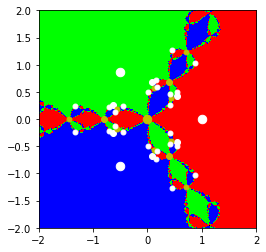

In [10]:
#Print the basinplot and the scatter plot
roots=sp.solve(z**3-1)
basinplot(z**3-1,z,[r.evalf() for r in roots], \
         np.array([[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0]]),\
         -2.0,2.0,-2.0,2.0,800,800)

for i in range(1,4):
    Newt=NewtonsMethod2(i)
    Per=NewtonPeriod2(i)
    xNewt=np.real(Newt)
    yNewt=np.imag(Newt)
    xPer=np.real(Per)
    yPer=np.imag(Per)
    plt.scatter(xNewt,yNewt, s=72/i, c='y')
    plt.scatter(xPer,yPer, s=72/i, c='w')


plt.show()

## Problem 2

In [5]:
## Let's start by loading all the weather data, storing it in a list of dictionaries. An element of 
## this list will consist of the weather file headers, turned into a dict-object.  

## There will also be an additional weather-table key that will contain a list of dict objects. 
## containing the data the from a line of the file. 

import datetime as dt
import os as os
import fnmatch as fn
from operator import itemgetter

wsubdir = fn.filter(os.listdir('../Data.Ass.2'), "w.*")
print("Weather subdirectories:", wsubdir)

## each file is of the form "key", "data" for several lines, then a blank space
## "Legend" then several (ignorable) lines, then a blank space
## "keys" separated by commas then
## remaining lines are the key values for each measurement. 

masterList = [] ## list of weather station dict objects

for wd in wsubdir:
    files = fn.filter(os.listdir('../Data.Ass.2/'+wd), "eng-daily*.csv")
    for wdf in files:
        with open('../Data.Ass.2/'+wd+'/'+wdf, encoding="UTF-8") as f:
            blanks=0
            content = f.readlines()
            FD = dict() ## file dict head.
            FL = [] ## file list.
            keys = []
            for LN in content:
                PL = LN.replace(u'\ufeff','').split(",")
                for i in range(len(PL)): # this removes the quotes around the numbers.
                    PL[i] = PL[i].translate({ord(c): None for c in '"\n'})
                if len(PL)==1 and PL[0]=='':
                    blanks+=1
                    if blanks==2 and PL[0]=='':
                        continue
                ## if blanks==0 we need to build the main dict
                ## if blanks==1 we ignore
                ## if blanks==2 we build the data.
                if blanks==0:
                    FD[PL[0]] = PL[1]
                    if PL[0]=="Station Name":
                        FD["Data"] = []
                if blanks==2:
                    if PL[0]=="Date/Time":
                        keys = PL
                    else:
                        FD["Data"].append( { keys[i] : PL[i] for i in range(len(keys)) } )
            masterList.append(FD)        

## make set of "Station Name"s. 
## use it to merge common station names into one (more useful) masterList.
sNames = { x['Station Name'] for x in masterList}
print("Station names:", sNames)

## return index of list of dict if dict keyed-element exists, -1 otherwise
def indIfExists(LOD, keyname, value):
    for i in range(len(LOD)):
        if LOD[i][keyname] == value:
            return i
    return -1

## run through masterlist, if that airport exists in mList we merge, if not, we copy it over.
mList = []
while len(masterList)>0:
    I = indIfExists(mList, 'Station Name', masterList[-1]['Station Name'])
    if I<0:
        mList.append(masterList.pop())
    else:
        mList[I]["Data"].extend(masterList.pop()["Data"])

## run through the weather station data, replace the date record with a datetime object
for WS in mList:
    badItems = set()
    for i in range(len(WS["Data"])):
        ## Let's convert the dict from strings to appropriate datetime and float objects
        ## dates with bad data we will flag and remove.
        for key, value in WS["Data"][i].items():
            if key=="Date/Time":
                WS["Data"][i][key] = dt.datetime.strptime(value, "%Y-%m-%d")
            elif key in [ 'Min Temp (°C)', 'Total Precip (mm)',  \
                          'Max Temp (°C)', 'Mean Temp (°C)']:
                try:
                    WS["Data"][i][key] = float(value)
                except:
                    badItems.add( i )
    #print(len(WS["Data"]), end=" ")
    WS["Data"] = [WS["Data"][i] for i in range(len(WS["Data"])) if i not in badItems]
    #print(len(WS["Data"]), "\n")
    WS["Data"] = sorted(WS["Data"], key=itemgetter("Date/Time"))

## now let's check for gaps.  We run through the weather station date and check the next day 
## is the previous day + one day.  If not, we start a new interval. 
print("Data intervals: ")
for WS in mList:
    print(WS['Station Name'], end=" ")
    ## find maximal consecutive date interval in data, then move on.
    i0 = 0 ## start interval
    i1 = 0 ## end interval
    ## if date interval [i0,i1] can be expanded to be consecutive, do it.
    ## if not, and if i1 not end of list, move to [i1+1,i1+1] and repeat
    while i1+1 != len(WS['Data']):
        ## if we can increment i1 and keep [i0,i1] consecutive, do it.
        if WS['Data'][i1+1]["Date/Time"]-WS['Data'][i0]["Date/Time"] != dt.timedelta(1+i1-i0):
            ## not consecutive. Move on.
            print(WS['Data'][i0]["Date/Time"].date(), "--", WS['Data'][i1]["Date/Time"].date(), "/ ", end='')
            i0 = i1+1
            i1 = i1+1
        else:
            i1 = i1+1
    print(WS['Data'][i0]["Date/Time"].date(), "--", WS['Data'][i1]["Date/Time"].date())


Weather subdirectories: ['w.sask', 'w.vic']
Station names: {"SASKATOON DIEFENBAKER INT'L A", 'SASKATOON SRC', "VICTORIA INT'L A", 'VICTORIA INTL A'}
Data intervals: 
VICTORIA INTL A 2013-07-11 -- 2013-09-02 / 2013-09-04 -- 2013-09-12 / 2013-09-15 -- 2013-09-16 / 2013-09-18 -- 2013-10-17 / 2013-10-20 -- 2013-10-24 / 2013-10-26 -- 2014-01-17 / 2014-01-19 -- 2014-10-16 / 2014-10-18 -- 2014-11-07 / 2014-11-09 -- 2014-11-20 / 2014-11-22 -- 2015-01-12 / 2015-01-15 -- 2015-06-13 / 2015-06-15 -- 2015-06-21 / 2015-06-23 -- 2015-07-03 / 2015-07-05 -- 2015-08-18 / 2015-08-20 -- 2015-10-26 / 2015-10-28 -- 2015-11-01 / 2015-11-03 -- 2015-11-30 / 2015-12-02 -- 2015-12-08 / 2015-12-10 -- 2015-12-23 / 2015-12-25 -- 2016-02-15 / 2016-02-17 -- 2016-03-18 / 2016-03-20 -- 2016-04-02 / 2016-04-04 -- 2016-05-04 / 2016-05-06 -- 2016-06-01 / 2016-06-03 -- 2016-06-22 / 2016-06-24 -- 2016-07-24 / 2016-07-27 -- 2016-10-08 / 2016-10-10 -- 2016-10-10 / 2016-10-12 -- 2017-05-21 / 2017-05-23 -- 2017-05-26 / 2017-05-

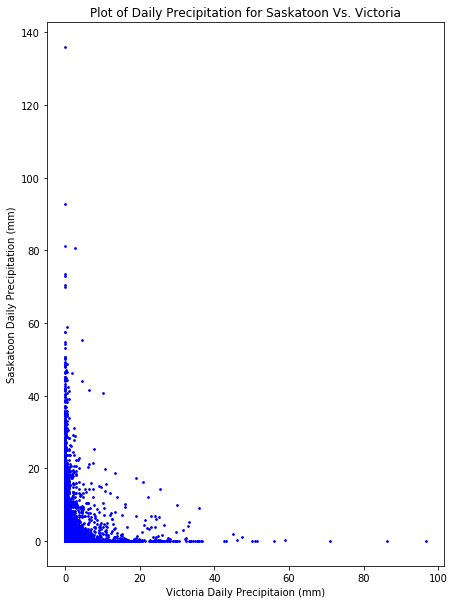

In [6]:
#Part a

#List Creation
VicToPre1=[x['Total Precip (mm)'] for x in mList[1]['Data']]
VicToPre2=[x['Total Precip (mm)'] for x in mList[2]['Data']]
VicToPre=VicToPre1 + VicToPre2
SaskToPre1=[x['Total Precip (mm)'] for x in mList[0]['Data']]
SaskToPre2=[x['Total Precip (mm)'] for x in mList[3]['Data']]
SaskToPre=SaskToPre1 + SaskToPre2
VicDatTim1=[x['Date/Time'] for x in mList[1]['Data']]
VicDatTim2=[x['Date/Time'] for x in mList[2]['Data']]
VicDatTim=VicDatTim1+VicDatTim2
SaskDatTim1=[x['Date/Time'] for x in mList[0]['Data']]
SaskDatTim2=[x['Date/Time'] for x in mList[3]['Data']]
SaskDatTim=SaskDatTim1+SaskDatTim2
PlotDataVic=[]
PlotDataSask=[]

#Look for entries with common dates
for i in range(len(VicDatTim)):
    for j in range(len(SaskDatTim)):
        if VicDatTim[i]-SaskDatTim[j]==dt.timedelta(0):
            PlotDataVic.append(VicToPre[i])
            PlotDataSask.append(SaskToPre[j])
            break
        
xw=max(VicToPre)-min(VicToPre)
yw=max(SaskToPre)-min(SaskToPre)
scl=max([xw,yw])

#Plot the values
plt.figure(figsize=(10*yw/scl, 10*xw/scl))
plt.scatter(PlotDataSask, PlotDataVic, c='b',s=3)
plt.title('Plot of Daily Precipitation for Saskatoon Vs. Victoria')
plt.xlabel('Victoria Daily Precipitaion (mm)')
plt.ylabel('Saskatoon Daily Precipitation (mm)')
plt.show()

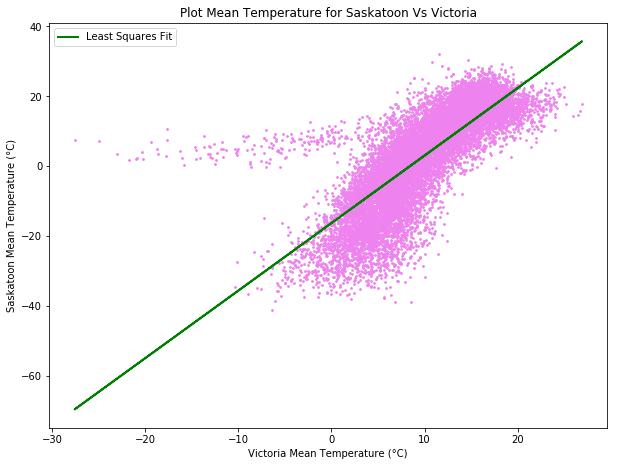

Least Squares Coefficients: 1.93048424838, -16.2193518263


In [7]:
#Part b

#List Creation
VicMean1=[x['Mean Temp (°C)'] for x in mList[1]['Data']]
VicMean2=[x['Mean Temp (°C)'] for x in mList[2]['Data']]
VicMean=VicMean1+VicMean2
SaskMean1=[x['Mean Temp (°C)'] for x in mList[0]['Data']]
SaskMean2=[x['Mean Temp (°C)'] for x in mList[3]['Data']]
SaskMean=SaskMean1+SaskMean2

PlotMeanVic=[]
PlotMeanSask=[]

#Find the common values
for i in range(len(VicDatTim)):
    for j in range(len(SaskDatTim)):
        if VicDatTim[i]-SaskDatTim[j]==dt.timedelta(0):
            PlotMeanVic.append(VicMean[i])
            PlotMeanSask.append(SaskMean[j])
            break

xw=max(VicMean)-min(VicMean)
yw=max(SaskMean)-min(SaskMean)
scl=max([xw,yw])

#Plot the values
plt.figure(figsize=(10*yw/scl,10*xw/scl))
plt.scatter(PlotMeanVic,PlotMeanSask, c='violet', s=3)
plt.title('Plot Mean Temperature for Saskatoon Vs Victoria')
plt.xlabel('Victoria Mean Temperature (°C)')
plt.ylabel('Saskatoon Mean Temperature (°C)')

a,b=np.polyfit(PlotMeanVic,PlotMeanSask, deg=1)
linearfit=a*(np.array(PlotMeanVic))+b
plt.plot(PlotMeanVic,linearfit, c='g',label='Least Squares Fit',linewidth=2.0)
plt.legend()
plt.show()
print("Least Squares Coefficients: " +str(a) +", " +str(b))

## Problem 3

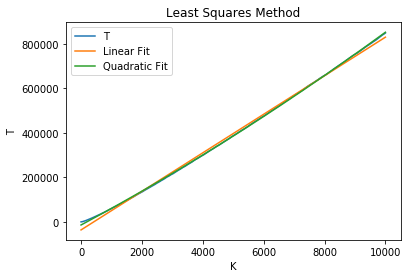

The coefficients of the Least Squares Linear Fit are: 
[    86.68935784 -36235.85927736]


The coefficients for the Least Squares Quadratic Fit are: 
[  1.33284479e-03   7.33609099e+01  -1.40240008e+04]


In [8]:
# Problem 3

#This function is a recursive application of f that ends with the final answer being one
def f(n):
    """Output of the piecewise function with input n"""
    if n%2 == 0:
        return n/2
    else:
        return 3*n+1

#Least Squares Interpolation for k=10,000
k=10000
L=[]
T=[0]
for n in range(k):
    i=n+1
    count=0
    while i != 1:
        i=f(i)
        count=count+1
    L += [count]
    T += [T[-1] + count]

x = np.linspace(0,k, num=k+1)    
p=np.polyfit(x,T,1)
linearfit=np.polyval(p,x)

d=np.polyfit(x,T,2)
quadfit=np.polyval(d,x)

#Plot for k=10,000
plt.plot(T, label='T')
plt.plot(linearfit, label='Linear Fit')
plt.plot(quadfit, label='Quadratic Fit')
plt.xlabel("K")
plt.ylabel("T")
plt.title("Least Squares Method")
plt.legend()
plt.show()

print("The coefficients of the Least Squares Linear Fit are: ")
print(p)
print("\n")
print("The coefficients for the Least Squares Quadratic Fit are: ")
print(d)

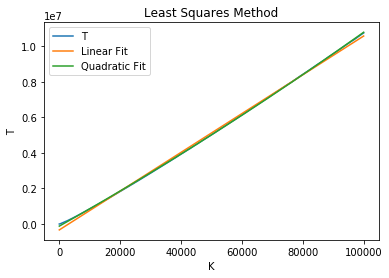

The coefficients of the Least Squares Linear Fit are: 
[  1.09122636e+02  -3.32408598e+05]


The coefficients for the Least Squares Quadratic Fit are: 
[  1.27480132e-04   9.63746226e+01  -1.19943836e+05]


Yes, it looks like they are converging


In [9]:
#Least Squares Interpolation for k=100,000
k=100000
L=[]
T=[0]
for n in range(k):
    i=n+1
    count=0
    while i != 1:
        i=f(i)
        count=count+1
    L += [count]
    T += [T[-1] + count]

x = np.linspace(0,k, num=k+1)    
p=np.polyfit(x,T,1)
linearfit=np.polyval(p,x)

d=np.polyfit(x,T,2)
quadfit=np.polyval(d,x)

#Plot for k=10,000
plt.plot(T, label='T')
plt.plot(linearfit, label='Linear Fit')
plt.plot(quadfit, label='Quadratic Fit')
plt.xlabel("K")
plt.ylabel("T")
plt.title("Least Squares Method")
plt.legend()
plt.show()

print("The coefficients of the Least Squares Linear Fit are: ")
print(p)
print("\n")
print("The coefficients for the Least Squares Quadratic Fit are: ")
print(d)
print("\n")
print("Yes, it looks like they are converging")